In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import h5py
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data
!date -I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-02-02


/tmp/ipykernel_84100/1331960015.py:5: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(SC))


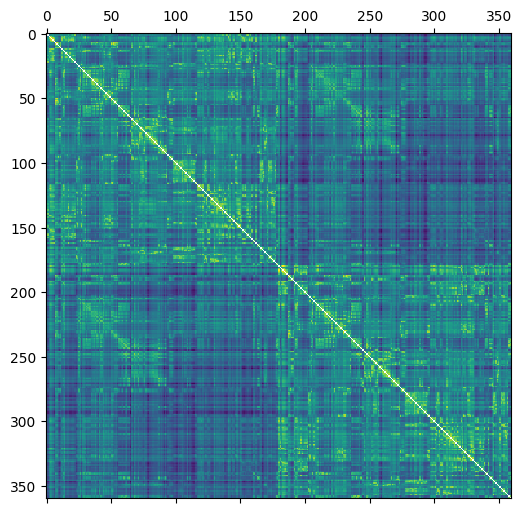

In [86]:
path_sc = '../data/external/OLD_rosen_halgren/public_PLoSBio_final/averageConnectivity_axonCount.mat'
with h5py.File(path_sc, 'r') as f:
    SC = np.array(f.get('axonCount'))

plt.matshow(np.log(SC))

In [73]:
rosen_labels = np.loadtxt('../data/external/OLD_rosen_halgren/public_PLoSBio_final/roi.txt', dtype=str)

In [75]:
rosen_labels[:10]

array(['L_V1', 'L_MST', 'L_V6', 'L_V2', 'L_V3', 'L_V4', 'L_V8', 'L_4',
       'L_3b', 'L_FEF'], dtype='<U8')

In [97]:
# load data F-TRACT
parcellation = "MNI-HCP-MMP1" 

response_probability = np.loadtxt(f'../data/external/F-TRACT_P_11_v2307/{parcellation}/probability.txt.gz')
response_amplitude = np.loadtxt(f'../data/external/F-TRACT_P_11_v2307/{parcellation}/amplitude__median.txt.gz')

print(response_probability.shape)

(360, 360)


In [76]:
ftract_labels = np.loadtxt(f'../data/external/F-TRACT_P_11_v2307/{parcellation}/MNI-HCP-MMP1.txt', dtype=str)

In [77]:
ftract_labels[:10]

array(['L_V1', 'L_V6', 'L_V2', 'L_V3', 'L_V4', 'L_V3A', 'L_V7', 'L_IPS1',
       'L_V3B', 'L_V6A'], dtype='<U8')

Whoops.

In [79]:
set(ftract_labels) == set(rosen_labels)

True

ok, let's reorder

In [80]:
import pandas as pd

/tmp/ipykernel_84100/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [85]:
df_SC =  pd.DataFrame(SC, index=rosen_labels, columns=rosen_labels)
df_SC = df_SC.loc[ftract_labels,ftract_labels]

SC_correct = df_SC.to_numpy()

/tmp/ipykernel_84100/1624948346.py:1: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(SC_correct))


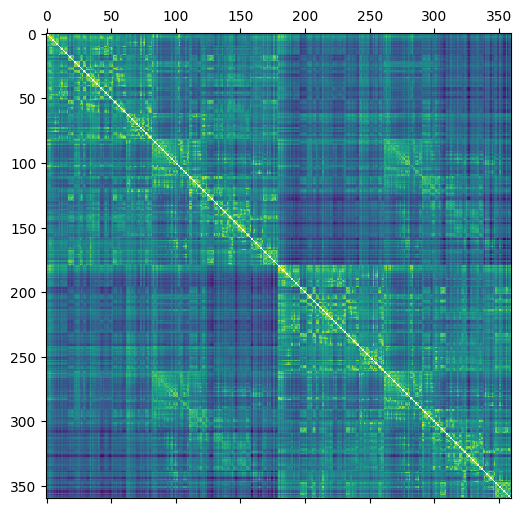

In [87]:
plt.matshow(np.log(SC_correct))

In [33]:
n_stim = np.loadtxt(f'../data/external/F-TRACT_P_11_v2307/{parcellation}/N_stimulations.txt.gz')

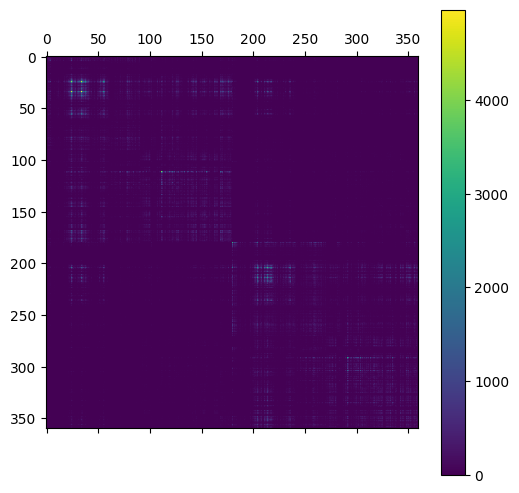

In [34]:
plt.matshow(n_stim); plt.colorbar()

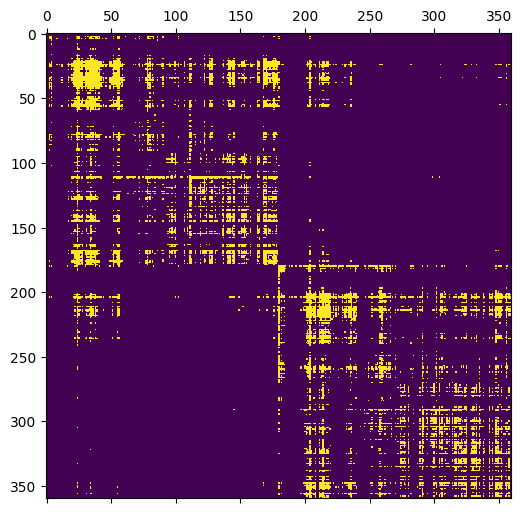

In [35]:
plt.matshow(n_stim>100, interpolation='none')

In [36]:
import numpy.ma as ma
def masked_correlation(A,B):
    return ma.corrcoef(ma.masked_invalid(A),ma.masked_invalid(B))

In [37]:
mask = n_stim>100

In [99]:
mask_amp = (n_stim*response_probability)>100 # 100 significant responses... right?

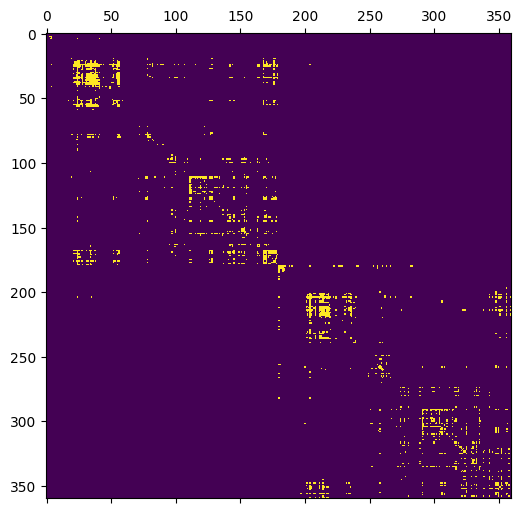

In [100]:
plt.matshow(mask_amp, interpolation='none')

In [91]:
np.fill_diagonal(mask, False)

In [38]:
np.any(np.isnan(response_probability[mask]))

False

In [92]:
np.corrcoef(response_probability[mask], SC_correct[mask])

array([[1.        , 0.33483348],
       [0.33483348, 1.        ]])

In [103]:
np.corrcoef(response_amplitude[mask_amp], SC_correct[mask_amp])

array([[1.        , 0.18339257],
       [0.18339257, 1.        ]])

In [104]:
masked_correlation(response_amplitude[mask], SC_correct[mask])

masked_array(
  data=[[1.0, 0.30957393250322596],
        [0.30957393250322596, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)